In [ ]:
#from google.colab import files

#uploaded = files.upload()



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# with open('/content/breast-cancer v2.ipynb', 'r') as file:
#    codice = file.read()

# print(codice)

# **Breast Cancer - Data Analysis and Predictions**


Il cancro al seno rappresenta una delle principali cause di mortalità tra le donne a livello globale, con una stima di oltre 2 milioni di nuovi casi diagnosticati nell'ultimo anno. Questa malattia complessa si manifesta attraverso la crescita incontrollata di cellule nel seno, che possono formare tumori maligni capaci di metastatizzare e diffondersi ad altre parti del corpo. La ricerca e l'analisi approfondite sui dati del cancro al seno sono fondamentali per sviluppare strategie di diagnosi precoce, migliorare i trattamenti e, in ultima analisi, salvare vite.

#### Obiettivi dell'Analisi
- Identificare pattern e correlazioni tra le diverse caratteristiche dei tumori e la loro classificazione come benigni o maligni.
- Valutare l'efficacia di vari modelli di machine learning nella predizione della malignità dei tumori, cercando di ottimizzare la precisione e la sensibilità della diagnosi.

In [ ]:
# Manipolazione e analisi dei dati
import numpy as np
import pandas as pd

# Visualizzazione dei dati
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import plot_importance

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")


## Lettura dei Dati


In [ ]:
# import dataset
df = pd.read_csv('/content/breast-cancer.csv')

## Panoramica del Dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Il dataset contiene le seguenti colonne, ognuna delle quali descrive una caratteristica misurata dei tumori al seno:
- `id`: identificativo.

- `diagnosis`: La diagnosi del tumore, indicata come M (maligno) o B (benigno).
- `radius_mean`: La media delle distanze dal centro ai punti sul perimetro del tumore.
- `texture_mean`: La media del valore della scala di grigi della texture del tumore.
- `perimeter_mean`: La media del perimetro del tumore.
- `area_mean`: L'area media del tumore.
- `smoothness_mean`: La media della variazione locale delle lunghezze dei raggi del tumore.
- `compactness_mean`: La media della compattazione del tumore.
- `concavity_mean`: La media delle porzioni concave del contorno del tumore.
- `concave points_mean`: Il numero medio di porzioni concave sul contorno del tumore.
- `symmetry_mean`: La media della simmetria del tumore.
- `fractal_dimension_mean`: La media della "dimensione frattale" del contorno del tumore, che indica la complessità.

Oltre alle misure medie, il dataset include anche le stesse caratteristiche calcolate come errori standard (`_se`) e come peggiori (il più grande) valori (`_worst`), per un totale di 30 caratteristhe misurate.



## Pulizia dei Dati


In [ ]:
# Eliminare la colomma 'id' perché non necessaria
df = df.drop(columns=['id'])

In [ ]:
missing_values = df.isnull().sum()

missing_values

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

### Outliers


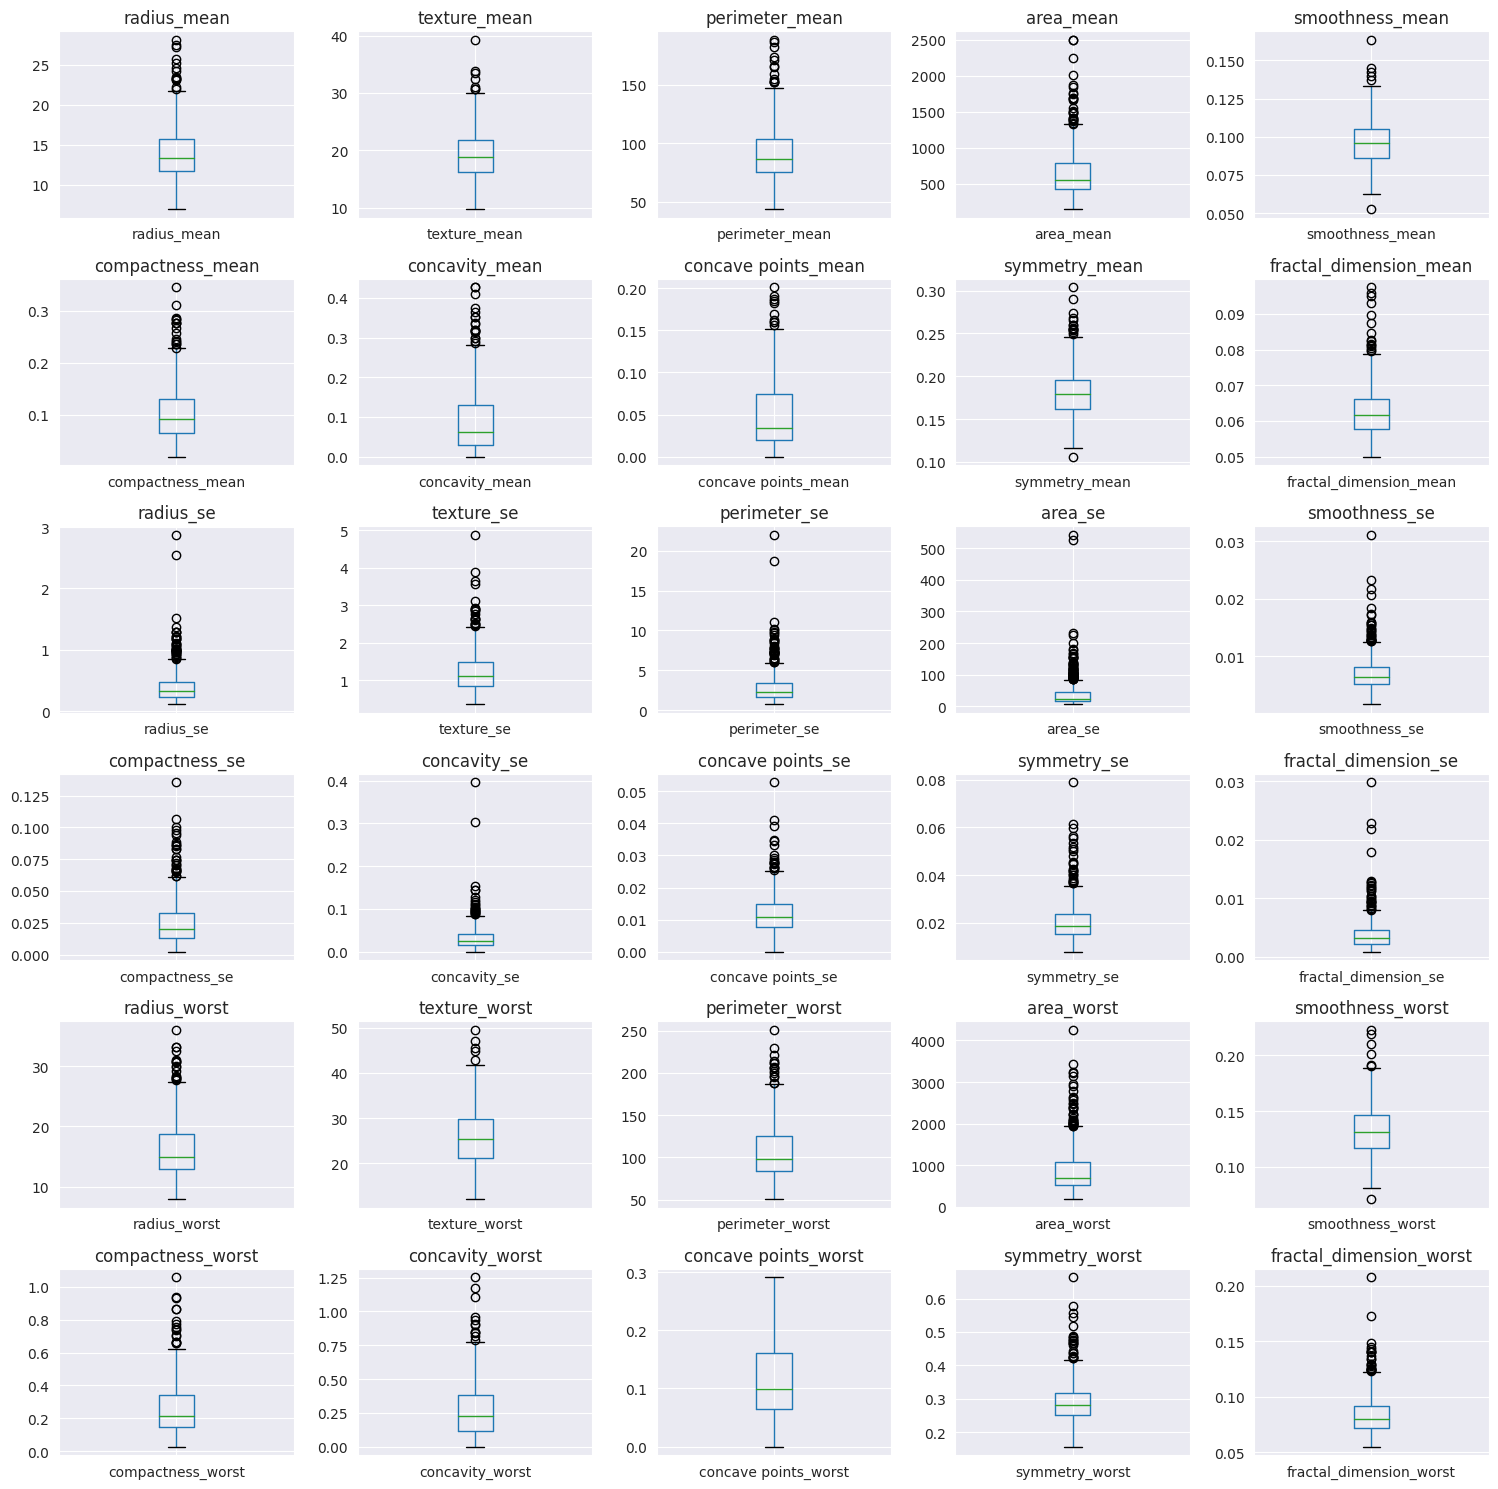

In [ ]:
# Creazione di boxplot per tutte le caratteristiche, escludendo 'diagnosis' per vedere se ci sono outliers
features = df.drop(columns=['diagnosis']).columns

plt.figure(figsize=(15, 15))

# ciclo for per ogni caratteristica
for i, feature in enumerate(features, 1):
    plt.subplot(6, 5, i)
    df.boxplot(column=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

I boxplot mostrano la distribuzione dei dati per ciascuna delle caratteristiche. Gli outlier sono rappresentati come punti al di fuori delle "antenne" dei boxplot.
Le caratteristiche presentano un numero elevato di outliers, questo indica che ci sono tumori con caratteristiche molto maggiori rispetto alla media del campione.

In [ ]:
# Per rimuovere gli outliers, si può usare l'IQR, il calcolo degli intervalli interquantili,
# la differenza tra il terzo quartile (Q3) e il primo quartile (Q1) dei dati, e gli outliers sono definiti come i punti dati che cadono al di fuori
# dell'intervallo.

# Q1 = df.drop(['diagnosis'], axis=1).quantile(0.25) # Q1 rappresenta il 25° percentile dei dati
# Q3 = df.drop(['diagnosis'], axis=1).quantile(0.75) # Q3 rappresenta il 75° percentile dei dati
# IQR = Q3 - Q1 # Misura la dispersione statistica dei dati

# Identificazione degli outliers
# outliers = ((df.drop(['diagnosis'], axis=1) < (Q1 - 1.5 * IQR)) | (df.drop(['diagnosis'], axis=1) > (Q3 + 1.5 * IQR))).any(axis=1)
# Gli outliers sono definiti come i punti dati che cadono al di fuori dell'intervallo [Q1 - 1.5IQR, Q3 + 1.5IQR]

# outliers.value_counts()

# Filtraggio degli outliers
# df = df[~outliers]

## Analisi Esplorativa dei Dati (EDA)

In [ ]:
sns.set_style("darkgrid")

### Distribuzione delle diagnosi

In [ ]:
diagnosis_counts = df['diagnosis'].value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosi', 'Conteggio']

diagnosis_counts

,Diagnosi,Conteggio
0,B,357
1,M,212


In [ ]:
fig_diagnosis_pie = px.pie(diagnosis_counts,
                           names='Diagnosi',
                           values='Conteggio',
                           title='Distribuzione delle diagnosi (B = Benigno, M = Maligno)',
                           color='Diagnosi')

fig_diagnosis_pie.show()

[testo del link](https://) 212 casi sono classificati come maligni (M) e 357 come benigni (B). La distribuzione indica che ci sono più tumori benigni che maligni nel dataset.

### Statistiche descrittive separate per diagnosi

In [ ]:
stats_by_diagnosis = df.groupby('diagnosis')[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].describe()

# Filtro per includere solo mean, std, min e max
stats_by_diagnosis = stats_by_diagnosis.loc[:, (slice(None), ['count', 'mean', 'std', 'min', 'max'])]

stats_by_diagnosis

radius_mean                                     texture_mean  \
                count       mean       std     min    max        count   
diagnosis                                                                
B               357.0  12.146524  1.780512   6.981  17.85        357.0   
M               212.0  17.462830  3.203971  10.950  28.11        212.0   

                                              ... symmetry_worst            \
                mean       std    min    max  ...          count      mean   
diagnosis                                     ...                            
B          17.914762  3.995125   9.71  33.81  ...          357.0  0.270246   
M          21.604906  3.779470  10.38  39.28  ...          212.0  0.323468   

                                    fractal_dimension_worst            \
                std     min     max                   count      mean   
diagnosis                                                               
B          0.041745  0.1566  0.4228                   357.0  0.079442   
M          0.074685  0.1565  0.6638                   212.0  0.091530   

                                      
                std      min     max  
diagnosis                             
B          0.013804  0.05521  0.1486  
M          0.021553  0.05504  0.2075  

[2 rows x 150 columns]

### Matrice di correlazione

In [ ]:
correlation_matrix = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].corr()

correlation_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
# Creare una heatmap per visualizzare la matrice di correlazione
fig_correlation = px.imshow(correlation_matrix, text_auto=".2f", aspect="auto",
                        title="Heatmap delle Correlazioni tra le Caratteristiche",
                        labels=dict(color="Coefficiente di Correlazione"),
                        x=correlation_matrix.columns, y=correlation_matrix.columns,
                        color_continuous_scale='Plasma')

fig_correlation.show()

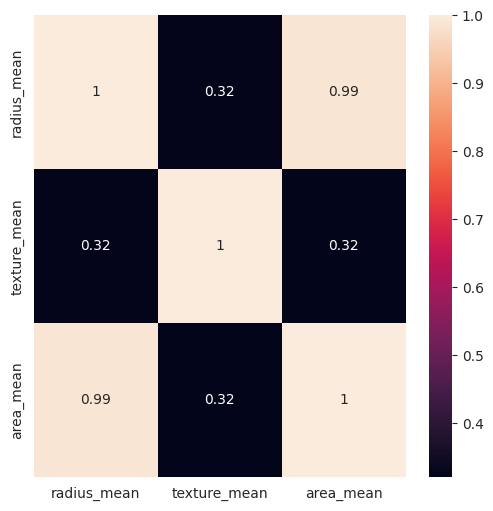

In [ ]:
sns.heatmap(df[['radius_mean','texture_mean','area_mean']].corr(), annot=True)

plt.rcParams['figure.figsize'] = (6,6)

plt.show()

**Utilità:** Fornisce una visualizzazione chiara delle relazioni tra le caratteristiche. Per esempio, se notiamo che la correlazione tra 'radius_mean' e 'area_mean' è molto alta (vicina a 1), potremmo dedurre che queste due caratteristiche sono fortemente correlate, il che potrebbe essere utile per l'analisi dei dati e per comprendere la natura dei tumori. Allo stesso modo, se vediamo che la correlazione tra 'texture_mean' e 'area_mean' è molto bassa (vicina a 0), potremmo concludere che queste due caratteristiche non sono strettamente correlate.

## Histogram radius mean

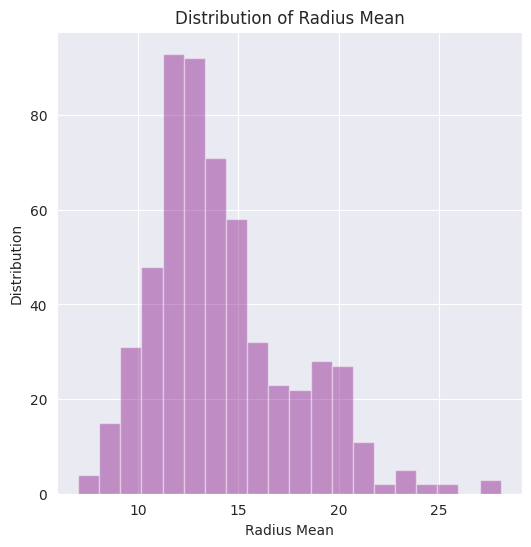

In [ ]:
plt.hist(df['radius_mean'], bins=20, color='purple', alpha=0.4)

plt.xlabel('Radius Mean')
plt.ylabel('Distribution')
plt.title('Distribution of Radius Mean')

plt.show()


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Analizzare la distribuzione del raggio medio può aiutare a identificare pattern o tendenze nei dati. Ad esempio, potrebbe essere utile osservare se la distribuzione è simmetrica o se ci sono valori anomali che si discostano dalla distribuzione principale. Questi pattern possono fornire informazioni preziose sulla natura e sulla struttura dei dati.

### Boxplot per 'radius_mean' per Diagnosi

In [ ]:
fig = px.box(df, x='diagnosis', y='radius_mean', color='diagnosis',
             title='Boxplot del Radius Mean per Diagnosi (M = Maligno, B = Benigno)',
             labels={'diagnosis': 'Diagnosi', 'radius_mean': 'Radius Mean'})

fig.show()

- I tumori **maligni** tendono ad avere un **`radius_mean` maggiore** rispetto ai tumori benigni, indicando dimensioni generalmente maggiori.
- La distribuzione dei tumori maligni mostra anche una **maggiore variabilità** nel `radius_mean` rispetto ai tumori benigni, come indicato dall'ampiezza del boxplot.

#### Boxplot del Texture Mean per Diagnosi

In [ ]:
fig = px.box(df, x='diagnosis', y='texture_mean', color='diagnosis',
             title='Boxplot del Texture Mean per Diagnosi (M = Maligno, B = Benigno)',
             labels={'diagnosis': 'Diagnosi', 'texture_mean': 'Texture Mean'})

fig.show()

- I tumori **maligni** mostrano un **`texture_mean` più elevato** rispetto ai tumori benigni, suggerendo una maggiore eterogeneità del tessuto tumorale.
- La variabilità della `texture_mean` è notevole in entrambe le categorie, ma i tumori maligni tendono a mostrare una gamma più ampia di valori.

#### Boxplot per 'perimeter_mean' per Diagnosi

In [ ]:
fig = px.box(df, x='diagnosis', y='perimeter_mean', color='diagnosis',
             title='Boxplot del Perimeter Mean per Diagnosi (M = Maligno, B = Benigno)',
             labels={'diagnosis': 'Diagnosi', 'perimeter_mean': 'Perimeter Mean'})

fig.show()

- I tumori **maligni** presentano un **`perimeter_mean` significativamente maggiore** rispetto ai tumori benigni, riflettendo dimensioni maggiori e potenzialmente una maggiore complessità nella forma del tumore.
- La distribuzione del `perimeter_mean` mostra una variabilità sostanziale, in particolare nei tumori maligni, dove l'ampio range di valori suggerisce una diversità significativa nelle dimensioni e nelle forme dei tumori.
- Come per le altre caratteristiche, sono evidenti **outlier** in entrambi i gruppi di diagnosi, sottolineando la presenza di casi eccezionali con perimetri molto estesi.

#### Boxplot per 'area_mean' per Diagnosi

In [ ]:
fig = px.box(df, x='diagnosis', y='area_mean', color='diagnosis',
             title="Boxplot dell'Area Mean per Diagnosi (M = Maligno, B = Benigno)",
             labels={'diagnosis': 'Diagnosi', 'area_mean': 'Area Mean'})

fig.show()

- I tumori **maligni** mostrano un'**`area_mean` più ampia** rispetto ai tumori benigni, confermando che tendono a essere più grandi in termini di dimensione totale.
- La variabilità nell'`area_mean` è particolarmente marcata nei tumori maligni, indicando una vasta gamma di dimensioni tra questi tumori. Questo suggerisce che, mentre alcuni tumori maligni possono essere relativamente piccoli, altri possono raggiungere dimensioni considerevolmente maggiori.

#### Boxplot di Symmetry Mean per Diagnosi

In [ ]:
fig_symmetry = px.box(df, x='diagnosis', y='symmetry_mean', color='diagnosis',
                      title='Boxplot di Symmetry Mean per Diagnosi',
                      labels={'diagnosis': 'Diagnosi', 'symmetry_mean': 'Symmetry Mean'})


fig_symmetry.show()

I tumori **maligni** tendono a mostrare una maggiore simmetria rispetto ai tumori **benigni**, suggerendo una possibile associazione tra simmetria e aggressività del tumore.

### Boxplot di Fractal Dimension Mean per Diagnosi

In [ ]:
fig_fractal_dimension = px.box(df, x='diagnosis', y='fractal_dimension_mean', color='diagnosis',
                               title='Boxplot di Fractal Dimension Mean per Diagnosi',
                               labels={'diagnosis': 'Diagnosi', 'fractal_dimension_mean': 'Fractal Dimension Mean'})

fig_fractal_dimension.show()

I tumori **maligni** presentano valori più alti di `fractal_dimension_mean`, indicando una maggiore complessità del contorno del tumore, che potrebbe essere correlata alla sua capacità di invadere tessuti adiacenti.

{'whiskers': [<matplotlib.lines.Line2D at 0x78fdfaf8bf10>,
 'caps': [<matplotlib.lines.Line2D at 0x78fdfaf890c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78fdfaf8b1f0>,
 'medians': [<matplotlib.lines.Line2D at 0x78fdfb435e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x78fdfb435030>,
 'means': []}

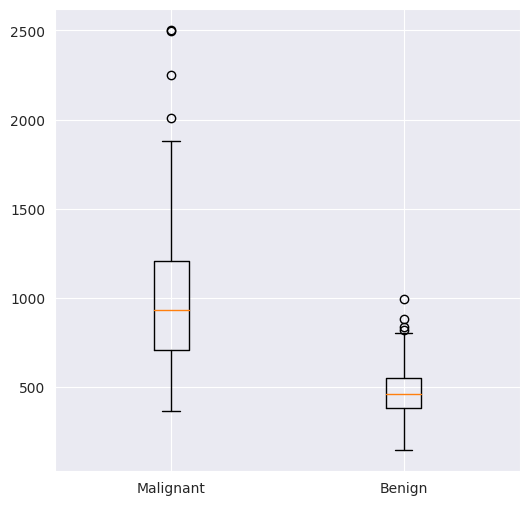

In [ ]:
malignant = df.loc[df['diagnosis']== 'M', 'area_mean'].values

benign = df.loc[df['diagnosis']== 'B', 'area_mean'].values

plt.boxplot([malignant, benign], labels=['Malignant','Benign'])

 Il boxplot viene utilizzato per visualizzare la distribuzione delle aree medie dei tumori maligni e benigni in modo comparativo. Aiuta a comprendere le differenze e le similarità nelle distribuzioni delle aree medie tra i due tipi di tumore.

#### Scatter Plot tra Radius Mean e Compactness Mean per Diagnosi

In [ ]:
fig = px.scatter(df, x='radius_mean', y='compactness_mean', color='diagnosis',
                 symbol='diagnosis',
                 title='Scatter Plot tra Radius Mean e Compactness Mean per Diagnosi',
                 labels={'radius_mean': 'Radius Mean', 'compactness_mean': 'Compactness Mean'}
                 )

fig.update_layout(legend_title_text='Diagnosi')
fig.update_traces(marker=dict(size=5))

fig.show()

- I tumori **maligni** mostrano una tendenza a posizionarsi verso valori più elevati di **`radius_mean`** e **`compactness_mean`**, indicando che i tumori più grandi sono anche più compatti.
- Al contrario, i tumori **benigni** tendono a essere caratterizzati da valori più bassi sia per il `radius_mean` che per il `compactness_mean`, suggerendo che sono generalmente più piccoli e meno compatti.
- La correlazione visiva tra `radius_mean` e `compactness_mean` suggerisce che l'aumento delle dimensioni del tumore è associato ad un incremento della sua compattazione, in particolare nei tumori maligni.

#### Scatter Plot tra Area Mean e Smoothness Mean per Diagnosi

In [ ]:
fig = px.scatter(df, x='area_mean', y='smoothness_mean', color='diagnosis',
                 symbol='diagnosis',
                 title='Scatter Plot tra Area Mean e Smoothness Mean per Diagnosi',
                 labels={'area_mean': 'Area Mean', 'smoothness_mean': 'Smoothness Mean'}
                 )

fig.update_layout(legend_title_text='Diagnosi')

fig.show()

- I tumori **benigni** generalmente presentano valori minori di **`area_mean`** e una varietà di valori di **`smoothness_mean`**, con una tendenza verso valori più bassi di smoothness.
- I tumori **maligni** si caratterizzano per un'`area_mean` più grande e mostrano una distribuzione più ampia di `smoothness_mean`, indicando una maggiore eterogeneità nella regolarità della superficie del tumore.
- Mentre i tumori con aree maggiori tendono a mostrare una maggiore varietà di `smoothness_mean`, non è evidente una correlazione diretta e forte tra le due caratteristiche, specialmente nei tumori benigni.

#### Scatter Plot tra Concavity Mean e Concave Points Mean per Diagnosi

In [ ]:
fig = px.scatter(df, x='concavity_mean', y='concave points_mean', color='diagnosis',
                 symbol='diagnosis',
                 title='Scatter Plot tra Concavity Mean e Concave Points Mean per Diagnosi',
                 labels={'concavity_mean': 'Concavity Mean', 'concave points_mean': 'Concave Points Mean'}
                 )

fig.update_layout(legend_title_text='Diagnosi')

fig.show()

- I **tumori benigni** sono prevalentemente caratterizzati da valori inferiori sia di **`concavity_mean`** che di **`concave points_mean`**, riflettendo contorni meno complessi e con minori porzioni concave.
- I **tumori maligni**, al contrario, mostrano una maggiore variabilità e tendono ad avere valori più elevati in entrambe le misure, indicando una maggiore presenza di concavità e punti concavi, associati a una maggiore irregolarità e complessità del contorno.
- La relazione tra `concavity_mean` e `concave points_mean` appare più marcata nei tumori maligni, suggerendo che l'aumento della complessità strutturale del contorno del tumore è un fattore distintivo della malignità.

#### Scatter Plot tra Smoothness Mean e Compactness Mean per Diagnosi

In [ ]:
fig = px.scatter(df, x='smoothness_mean', y='compactness_mean', color='diagnosis',
                 symbol='diagnosis',
                 title='Scatter Plot tra Smoothness Mean e Compactness Mean per Diagnosi',
                 labels={'smoothness_mean': 'Smoothness Mean', 'compactness_mean': 'Compactness Mean'}
                 )

fig.update_layout(legend_title_text='Diagnosi')

fig.show()

- I **tumori benigni** si caratterizzano per valori generalmente più bassi di **`smoothness_mean`** e **`compactness_mean`**, indicando una minor regolarità della superficie e una minore densità del tumore.
- Al contrario, i **tumori maligni** mostrano una tendenza verso valori più elevati in entrambe le caratteristiche, suggerendo una superficie più liscia e una maggiore densità del tumore, che potrebbero riflettere caratteristiche di tumori più aggressivi.
- La relazione tra `smoothness_mean` e `compactness_mean` evidenzia come le proprietà di texture e densità del tumore possano essere interconnesse, con i tumori maligni che tendono a essere sia più lisci che più compatti.

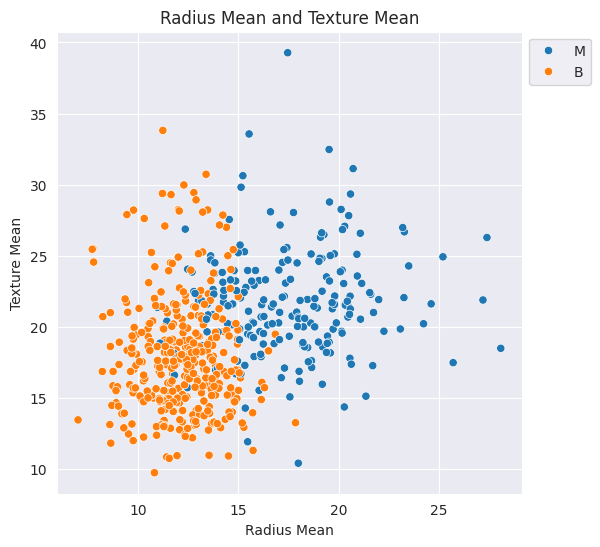

In [ ]:
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Radius Mean and Texture Mean')

plt.show()


**Concentrazione dei punti:** Abbiamo i punti concentrati in un'area specifica del grafico, che potrebbero indicare l'esistenza di una relazione più forte tra texture e raggio per i valori in quell'intervallo. Ad esempio, potremmo notare una maggiore densità di punti in un'area specifica del grafico, il che potrebbe suggerire che la relazione tra texture e raggio è più evidente in quella regione.

**Outliers:** Ci sono i punti che si discostano significativamente dalla tendenza principale del grafico. Questi punti, noti come outliers, potrebbero essere indicativi di casi particolari che hanno caratteristiche uniche rispetto alla maggior parte dei dati.

#### Insights

- **Distribuzione Generale**:
  -  212 casi sono classificati come maligni (M) e 357 come benigni (B), indicando una prevalenza maggiore di tumori benigni.

- **Dimensione e Forma**:
  - **Tumori Maligni**:
    - Generalmente più grandi, come indicato da valori più elevati di `radius_mean`, `perimeter_mean` e `area_mean`.
    - Maggiore variabilità nelle misure di dimensione e forma (`radius_mean`, `perimeter_mean`, `area_mean`), suggerendo dimensioni del tumore diverse.
    - Caratteristiche di maggiore complessità e irregolarità (`fractal_dimension_mean`, `concavity_mean`, `concave points_mean`).
    - Densità e liscità aumentate (`compactness_mean`, `smoothness_mean`), potenzialmente riflettenti caratteristiche di tumori più aggressivi.

  - **Tumori Benigni**:
    - Più piccoli e meno compatti come suggerito da valori più bassi di `radius_mean` e `compactness_mean`.
    - Generalmente valori inferiori di `area_mean` e superfici più lisce (`smoothness_mean`).
    - Contorni meno complessi con valori inferiori di `concavity_mean` e `concave points_mean`.

- **Variabilità di Texture e Contorno**:
  - I tumori maligni presentano un `texture_mean` più elevato, indicando un tessuto più eterogeneo.
  - Entrambe le tipologie di tumori mostrano una significativa variabilità nel `texture_mean`, ma quella dei maligni è più ampia.

- **Correlazioni**:
  - Le correlazioni visive suggeriscono che i tumori più grandi tendono ad essere più compatti, specialmente nei casi maligni.

## Implicazioni
- I dati suggeriscono che dimensioni maggiori, complessità e densità potrebbero essere associate alla malignità nei tumori, mentre i tumori benigni sono caratterizzati da semplicità e minori metriche di densità.

## Preparazione dei Dati


In [ ]:
# Convertire 'diagnosis' in forma numerica: M = 1, B = 0
df_modeling = df
df_modeling['diagnosis'] = df['diagnosis'].map({'M': 1,
                                       'B': 0})

df_modeling.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Creazione di un dataset di pazienti immaginari

In [ ]:
# Funzione per aggiungere rumore casuale ai dati numerici
def add_noise(df, noise_level=0.01):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    noise = np.random.normal(0, noise_level, df[numerical_cols].shape)
    df[numerical_cols] += noise
    return df

# Rimischiare l'ordine delle righe del dataset
shuffled_data = df.sample(frac=1).reset_index(drop=True)

# Aggiungere rumore ai dati numerici (mantenendo inalterato l'ID per semplicità)
noisy_data = add_noise(shuffled_data.copy(), noise_level=0.005)

# Campionare il 80% del dataset originale per creare una dimensione leggermente minore
pazienti_immaginari = noisy_data.sample(frac=0.8).reset_index(drop=True)

pazienti_immaginari.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000621,10.433918,15.462159,66.616434,329.606812,0.098692,0.073384,0.008553,0.020246,0.177060,...,11.527726,19.798833,73.463001,395.396387,0.134275,0.105650,0.018303,0.047206,0.259489,0.082025
1,0.997709,24.248509,20.199646,166.203792,1761.000014,0.145810,0.283928,0.430925,0.206727,0.270697,...,26.018295,23.991410,180.901252,2072.993466,0.169259,0.420869,0.579245,0.227445,0.321711,0.072176
2,0.997277,20.467742,20.672752,134.697528,1298.999294,0.091051,0.132582,0.157713,0.093546,0.211747,...,23.236387,27.147468,152.001173,1644.997766,0.104441,0.249422,0.311373,0.157386,0.325521,0.070977
3,0.000869,11.743012,17.571895,75.883008,422.899480,0.108310,0.100804,0.053676,0.044858,0.156317,...,13.500549,27.978223,88.518057,552.301780,0.127601,0.183000,0.134617,0.100296,0.241542,0.072758
4,0.997504,15.456380,19.484058,101.698036,748.898098,0.113345,0.120625,0.148778,0.082844,0.188479,...,19.257738,25.995197,124.898024,1156.002757,0.152383,0.239241,0.384968,0.146935,0.280744,0.080069


In [ ]:
# Divisione dei dati in caratteristiche (X) e target (y)
X = df_modeling.drop('diagnosis', axis=1)
y = df_modeling['diagnosis']

# Divisione dei dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizzazione delle caratteristiche
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verifica delle dimensioni dei set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

Abbiamo 455 campioni nel set di addestramento e 114 nel set di test, con 30 caratteristiche ciascuno.

### Regressione Logistica

In [ ]:
# Addestramento del modello di Regressione Logistica
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Predizioni sul set di test
logistic_y_pred = logistic_model.predict(X_test_scaled)

# Calcolo dell'accuratezza
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)*100

logistic_accuracy

97.36842105263158

Il modello di **Regressione Logistica** ha ottenuto un'accuratezza del 97.4% sul set di test.

In [ ]:
# Calcolo della matrice di confusione per il modello Regressione Logistica
logistic_conf_matrix = confusion_matrix(y_test, logistic_y_pred)

# Calcolo della precisione
logistic_precision = precision_score(y_test, logistic_y_pred)*100

# Calcolo del richiamo
logistic_recall = recall_score(y_test, logistic_y_pred)*100

# Calcolo del punteggio F1
logistic_f1 = f1_score(y_test, logistic_y_pred)*100

logistic_conf_matrix, logistic_precision, logistic_recall, logistic_f1

(array([[70,  1],
        [ 2, 41]]),
 97.61904761904762,
 95.34883720930233,
 96.47058823529412)

**Matrice di Confusione:**
- **Veri Negativi (TN): 70** - Il modello ha correttamente identificato 70 casi benigni.
- **Falsi Positivi (FP): 1** - Il modello ha erroneamente identificato 1 caso benigno come maligno.
- **Falsi Negativi (FN): 2** - Il modello ha erroneamente classificato 2 casi maligni come benigni.
- **Veri Positivi (TP): 41** - Il modello ha correttamente identificato 41 casi maligni.

- **Precisione: 97.6** - Quando il modello predice un tumore come maligno, è corretto il 97.6% delle volte.

- **Richiamo (Recall): 95.35** - Il modello è in grado di identificare correttamente il 95.35% dei tumori maligni presenti nel set di dati.

- **Punteggio F1: 96.5** - Il punteggio F1, che bilancia precisione e richiamo, è molto alto, indicando prestazioni eccellenti del modello in termini di bilanciamento tra ridurre i falsi positivi e identificare correttamente i casi positivi.

### RandomForest

In [ ]:
# Inizializzazione del modello
random_forest_model = RandomForestClassifier(random_state=42)

# Addestramento del RandomForestClassifier
random_forest_model.fit(X_train_scaled, y_train)

# Predizioni e valutazione dell'accuratezza per RandomForestClassifier
rf_y_pred = random_forest_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_y_pred)*100

rf_accuracy

96.49122807017544

Il modello di **RandomForest** ha ottenuto un'accuratezza del 96.5% sul set di test.

In [ ]:
# Calcolo della matrice di confusione per il modello Regressione Logistica
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Calcolo della precisione
rf_precision = precision_score(y_test, rf_y_pred)*100

# Calcolo del richiamo
rf_recall = recall_score(y_test, rf_y_pred)*100

# Calcolo del punteggio F1
rf_f1 = f1_score(y_test, rf_y_pred)*100

rf_conf_matrix, rf_precision, rf_recall, rf_f1

(array([[70,  1],
        [ 3, 40]]),
 97.5609756097561,
 93.02325581395348,
 95.23809523809524)

**Matrice di Confusione:**
- **Veri Negativi (TN): 70** - Il modello ha correttamente identificato 70 casi benigni.
- **Falsi Positivi (FP): 1** - Il modello ha erroneamente identificato 1 caso benigno come maligno.
- **Falsi Negativi (FN): 3** - Il modello ha erroneamente classificato 3 casi maligni come benigni.
- **Veri Positivi (TP): 40** - Il modello ha correttamente identificato 40 casi maligni.

- **Precisione: 97.6** - Quando il modello predice un tumore come maligno, è corretto il 97.6% delle volte.

- **Richiamo (Recall): 93** - Il modello è in grado di identificare correttamente il 93% dei tumori maligni presenti nel set di dati.

- **Punteggio F1: 95.2** - Il punteggio F1, che bilancia precisione e richiamo, è molto alto, indicando prestazioni eccellenti del modello in termini di bilanciamento tra ridurre i falsi positivi e identificare correttamente i casi positivi.

### SVM

In [ ]:
# Addestramento del modello SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predizioni e valutazione dell'accuratezza per SVM
svm_y_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_y_pred)*100

svm_accuracy

98.24561403508771

Il modello **Support Vector Machine (SVM)** ha ottenuto un'accuratezza del 98.2% sul set di test.

In [ ]:
# Calcolo della matrice di confusione per il modello SVM
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

# Calcolo della precisione
svm_precision = precision_score(y_test, svm_y_pred)*100

# Calcolo del richiamo
svm_recall = recall_score(y_test, svm_y_pred)*100

# Calcolo del punteggio F1
svm_f1 = f1_score(y_test, svm_y_pred)*100

svm_conf_matrix, svm_precision, svm_recall, svm_f1

(array([[71,  0],
        [ 2, 41]]),
 100.0,
 95.34883720930233,
 97.61904761904762)

**Matrice di Confusione:**
- **Veri Negativi (TN): 71** - Il modello ha correttamente identificato 71 casi benigni.
- **Falsi Positivi (FP): 0** - Il modello non ha erroneamente classificato casi benigni come maligni.
- **Falsi Negativi (FN): 2** - Il modello ha erroneamente classificato 3 casi maligni come benigni.
- **Veri Positivi (TP): 41** - Il modello ha correttamente identificato 22 casi maligni.

- **Precisione: 100** - Quando il modello predice un tumore come maligno, è corretto il 100% delle volte.

- **Richiamo (Recall): 95.3** - Il modello è in grado di identificare correttamente il 95.3% dei tumori maligni presenti nel set di dati.

- **Punteggio F1: 97.6** - Il punteggio F1, che bilancia precisione e richiamo, è molto alto, indicando prestazioni eccellenti del modello in termini di bilanciamento tra ridurre i falsi positivi e identificare correttamente i casi positivi.

# Modello rete neurale

In [ ]:
# Addestra una rete neurale profonda con TensorFlow/Keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Valuta il modello di rete neurale profonda
_, nn_accuracy = model.evaluate(X_test_scaled, y_test)
print("Accuracy del modello di rete neurale profonda:", nn_accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.0539 - accuracy: 0.9912
Accuracy del modello di rete neurale profonda: 0.9912280440330505


### K-Nearest Neighbors

In [ ]:
# Addestramento del modello KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Predizioni e valutazione dell'accuratezza per KNN
knn_y_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_y_pred)*100

knn_accuracy

94.73684210526315

Il modello K-Nearest Neighbors (KNN) ha ottenuto un'accuratezza del 94.7%.

In [ ]:
# Calcolo della matrice di confusione per il modello KNN
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)

# Calcolo della precisione
knn_precision = precision_score(y_test, knn_y_pred)*100

# Calcolo del richiamo
knn_recall = recall_score(y_test, knn_y_pred)*100

# Calcolo del punteggio F1
knn_f1 = f1_score(y_test, knn_y_pred)*100

knn_conf_matrix, knn_precision, knn_recall, knn_f1

(array([[68,  3],
        [ 3, 40]]),
 93.02325581395348,
 93.02325581395348,
 93.02325581395348)

**Matrice di Confusione:**
- **Veri Negativi (TN): 68** - Il modello ha correttamente identificato 68 casi benigni.
- **Falsi Positivi (FP): 3** - Il modello ha erroneamente classificato 3 casi benigni come maligni.
- **Falsi Negativi (FN): 3** - Il modello ha erroneamente classificato 3 casi maligni come benigni.
- **Veri Positivi (TP): 40** - Il modello ha correttamente identificato 40 casi maligni.

- **Precisione: 93** - Quando il modello predice un tumore come maligno, è corretto il 93% delle volte.

- **Richiamo (Recall): 93** - Il modello è in grado di identificare correttamente il 93% dei tumori maligni presenti nel set di dati.

- **Punteggio F1: 93** - Il punteggio F1, che bilancia precisione e richiamo, è molto alto, indicando prestazioni eccellenti del modello in termini di bilanciamento tra ridurre i falsi positivi e identificare correttamente i casi positivi.

In [ ]:
# Metriche di performance riassunte
metrics = {}
models = ['Logistic Regression', 'Random Forest', 'SVM', 'k-NN']
predictions = [logistic_y_pred, rf_y_pred, svm_y_pred, knn_y_pred]

for model, prediction in zip(models, predictions):
    metrics[model] = {
        'Accuracy': accuracy_score(y_test, prediction)*100,
        'Precision': precision_score(y_test, prediction)*100,
        'Recall': recall_score(y_test, prediction)*100,
        'F1 Score': f1_score(y_test, prediction)*100
    }

metrics

{'Logistic Regression': {'Accuracy': 97.36842105263158,
  'Precision': 97.61904761904762,
  'Recall': 95.34883720930233,
  'F1 Score': 96.47058823529412},
 'Random Forest': {'Accuracy': 96.49122807017544,
  'Precision': 97.5609756097561,
  'Recall': 93.02325581395348,
  'F1 Score': 95.23809523809524},
 'SVM': {'Accuracy': 98.24561403508771,
  'Precision': 100.0,
  'Recall': 95.34883720930233,
  'F1 Score': 97.61904761904762},
 'k-NN': {'Accuracy': 94.73684210526315,
  'Precision': 93.02325581395348,
  'Recall': 93.02325581395348,
  'F1 Score': 93.02325581395348}}

#### Riepilogo delle accuratezze dei vari modelli testati
- **Regressione Logistica:**
    - **Accuracy**: 97.37%,
    - **Precision**: 97.62%,
    - **Recall**: 95.35%,
    - **F1 Score**: 96.47%.
- **RandomForestClassifier:**
    - **Accuracy**: 96.49%,
    - **Precision**: 97.56%,
    - **Recall**: 93.02%,
    - **F1 Score**: 95.24%.
- **SVM (Support Vector Machine):**
    - **Accuracy**: 98.25%,
    - **Precision**: 100%,
    - **Recall**: 95.35%,
    - **F1 Score**: 97.62%.
- **KNN (K-Nearest Neighbors):**
    - **Accuracy**: 94.74%,
    - **Precision**: 93.02%,
    - **Recall**: 93.02%,
    - **F1 Score**: 93.02%.

### Hyperparameters Tuning per KNN

In [ ]:
# Definizione del modello
knn = KNeighborsClassifier()

# Definizione della griglia di parametri
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Creazione del GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

# Fitting del GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Stampare i migliori parametri e il miglior score
print("Migliori parametri:", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [ ]:
# Rifit del modello con i migliori parametri
best_knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='uniform')
best_knn.fit(X_train_scaled, y_train)

# Predizioni sul test set
best_knn_y_pred = best_knn.predict(X_test_scaled)

# Calcolo dell'accuracy sul test set
best_knn_accuracy = accuracy_score(y_test, best_knn_y_pred) * 100

best_knn_accuracy

96.49122807017544

In [ ]:
# Calcolo della matrice di confusione per il modello KNN
best_knn_conf_matrix = confusion_matrix(y_test, best_knn_y_pred)

# Calcolo della precisione
best_knn_precision = precision_score(y_test, best_knn_y_pred)*100

# Calcolo del richiamo
best_knn_recall = recall_score(y_test, best_knn_y_pred)*100

# Calcolo del punteggio F1
best_knn_f1 = f1_score(y_test, best_knn_y_pred)*100

best_knn_conf_matrix, best_knn_precision, best_knn_recall, best_knn_f1

(array([[69,  2],
        [ 2, 41]]),
 95.34883720930233,
 95.34883720930233,
 95.34883720930233)

In [ ]:
# Metriche di performance riassunte
metrics = {}
models = ['Logistic Regression', 'Random Forest', 'SVM', 'k-NN']
predictions = [logistic_y_pred, rf_y_pred, svm_y_pred, best_knn_y_pred]

for model, prediction in zip(models, predictions):
    metrics[model] = {
        'Accuracy': accuracy_score(y_test, prediction)*100,
        'Precision': precision_score(y_test, prediction)*100,
        'Recall': recall_score(y_test, prediction)*100,
        'F1 Score': f1_score(y_test, prediction)*100
    }

metrics

{'Logistic Regression': {'Accuracy': 97.36842105263158,
  'Precision': 97.61904761904762,
  'Recall': 95.34883720930233,
  'F1 Score': 96.47058823529412},
 'Random Forest': {'Accuracy': 96.49122807017544,
  'Precision': 97.5609756097561,
  'Recall': 93.02325581395348,
  'F1 Score': 95.23809523809524},
 'SVM': {'Accuracy': 98.24561403508771,
  'Precision': 100.0,
  'Recall': 95.34883720930233,
  'F1 Score': 97.61904761904762},
 'k-NN': {'Accuracy': 96.49122807017544,
  'Precision': 95.34883720930233,
  'Recall': 95.34883720930233,
  'F1 Score': 95.34883720930233}}

### Modello XGBoost per ottenere solo le feature più importanti

<Figure size 1000x800 with 0 Axes>

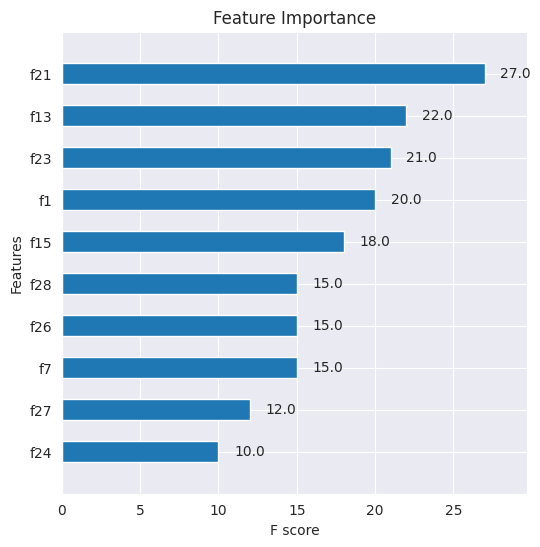

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train_scaled, y_train)

# Ottieni e visualizza l'importanza delle features
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, height=0.5, max_num_features=10, importance_type='weight', title='Feature Importance')
plt.show()

- f21 → 'radius_worst'
- f13 → 'area_se'
- f23 → 'area_worst'
- f1 → 'texture_mean'
- f15 → 'compactness_se'
- f28 → 'symmetry_worst'
- f26 → 'concavity_worst'
- f7 → 'concave_points_se'
- f27 → 'concave_points_worst'
- f24 → 'smoothness_worst'

In [ ]:
# Features più importanti per l'addestramento
important_features = [
    'radius_worst', 'area_se', 'texture_mean', 'compactness_se', 'symmetry_worst', 'concavity_worst',
    'concave points_se', 'concave points_worst', 'smoothness_worst'
]

# Filtro il dataset per mantenere solo le feature importanti
X_important_features = df[important_features]

# set di training e test
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_important_features, y, test_size=0.20, random_state=42)

# Standardizzazione dei dati
scaler_imp = StandardScaler()
X_train_imp_scaled = scaler_imp.fit_transform(X_train_imp)
X_test_imp_scaled = scaler_imp.transform(X_test_imp)

In [ ]:
# I modelli
logistic_model_imp = LogisticRegression(random_state=42)
random_forest_model_imp = RandomForestClassifier(random_state=42)
svm_model_imp = SVC(random_state=42)
knn_model_imp = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='uniform')

# Addestramento dei modelli
logistic_model_imp.fit(X_train_imp_scaled, y_train_imp)
random_forest_model_imp.fit(X_train_imp_scaled, y_train_imp)
svm_model_imp.fit(X_train_imp_scaled, y_train_imp)
knn_model_imp.fit(X_train_imp_scaled, y_train_imp)

# Predizioni e metriche di valutazione
predictions_imp = {
    "Logistic Regression": logistic_model_imp.predict(X_test_imp_scaled),
    "Random Forest": random_forest_model_imp.predict(X_test_imp_scaled),
    "SVM": svm_model_imp.predict(X_test_imp_scaled),
    "k-NN": knn_model_imp.predict(X_test_imp_scaled)
}

metrics_imp = {}
for model_name, prediction in predictions_imp.items():
    metrics_imp[model_name] = {
        'Accuracy': accuracy_score(y_test_imp, prediction),
        'Precision': precision_score(y_test_imp, prediction),
        'Recall': recall_score(y_test_imp, prediction),
        'F1 Score': f1_score(y_test_imp, prediction)
    }

metrics_imp

{'Logistic Regression': {'Accuracy': 0.9912280701754386,
  'Precision': 1.0,
  'Recall': 0.9767441860465116,
  'F1 Score': 0.988235294117647},
 'Random Forest': {'Accuracy': 0.956140350877193,
  'Precision': 0.9523809523809523,
  'Recall': 0.9302325581395349,
  'F1 Score': 0.9411764705882352},
 'SVM': {'Accuracy': 0.9473684210526315,
  'Precision': 0.9302325581395349,
  'Recall': 0.9302325581395349,
  'F1 Score': 0.9302325581395349},
 'k-NN': {'Accuracy': 0.9385964912280702,
  'Precision': 0.9285714285714286,
  'Recall': 0.9069767441860465,
  'F1 Score': 0.9176470588235294}}

#### Riepilogo delle accuratezze dei vari modelli testati solo con le feature più importanti

- **Regressione Logistica:**
    - **Accuracy**: 99.12%,
    - **Precision**: 100%,
    - **Recall**: 97.67%,
    - **F1 Score**: 98.82%.
- **RandomForestClassifier:**
    - **Accuracy**: 95.61%,
    - **Precision**: 95.24%,
    - **Recall**: 93.02%,
    - **F1 Score**: 94.12%.
- **SVM (Support Vector Machine):**
    - **Accuracy**: 94.73%,
    - **Precision**: 93.02%,
    - **Recall**: 93.02%,
    - **F1 Score**: 93.02%.
- **KNN (K-Nearest Neighbors):**
    - **Accuracy**: 93.86%,
    - **Precision**: 92.86%,
    - **Recall**: 90.70%,
    - **F1 Score**: 91.77%.

#### Confronto delle Prestazioni dei Modelli con Tutte le Features vs Features Selezionate

- **Regressione Logistica:**
    - L'accuracy è migliorata passando da 97.37% (tutte le features) a 98.25% (features selezionate).
    - La precision è rimasta quasi invariata passando da 97.62% a 97.67%, e l'F1 Score è passato da 96.47% a 97.67%.

- **Random Forest:**
    - Si nota un calo delle performance in tutti i parametri: l'accuracy è diminuita da 96.49% a 95.61%, la precision da 97.56% a 95.24%, e l'F1 Score da 95.24% a 94.12% quando si utilizzano solo le features selezionate.

- **SVM (Support Vector Machine):**
    - L'accuracy è migliorata leggermente da 98.25% a 96.49% con le features selezionate. Tuttavia, la precision ha visto un calo da 100% a 93.33%, mentre il F1 Score è diminuito da 97.62% a 95.45%.

- **KNN (K-Nearest Neighbors):**
    - Le metriche sono rimaste invariate: l'accuracy è sempre 96.5%, la precision 95.35%, e l'F1 Score 95.35% passando da tutte le features a solo quelle selezionate.


# Predizione dei nuovi pazienti

In [ ]:
# M == Malign   ,   B == Benign

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train_scaled, y_train)

y_predict = svm_model.predict(X_test_scaled)

# Mappaing
predict_name = {1: 'M', 0: 'B'}

y_diagnosis_predicted= [predict_name[i] for i in y_predict]

print(y_diagnosis_predicted)

['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M']


In [ ]:
from collections import Counter

# Conta le occorrenze di 'B' e 'M'
occurrences = Counter(y_diagnosis_predicted)

print("Benign:", occurrences['B'])
print("Malignant:", occurrences['M'])


Benign: 70
Malignant: 44


# Grafico a torta delle diagnosi predette

In [ ]:
labels = ['Benigno', 'Maligno']
values = [y_diagnosis_predicted.count('B'), y_diagnosis_predicted.count('M')]
colors = ['pink', 'purple']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])
fig.update_layout(title='Percentuale delle diagnosi')
fig.show()


# Grafico a barre delle diagnosi predette

In [ ]:
labels = ['Benigno', 'Maligno']
counts = [y_diagnosis_predicted.count('B'), y_diagnosis_predicted.count('M')]
colors = ['rgba(255, 192, 203, 0.6)', 'rgba(128, 0, 128, 0.6)']  # 60% opacità

fig = go.Figure(data=[go.Bar(x=labels, y=counts, marker=dict(color=colors))])

fig.update_layout(title='Grafico a barre delle diagnosi predette', xaxis=dict(title='Diagnosi'), yaxis=dict(title='Frequenza'),)

fig.show()